___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Autoencoder Exercise

## Complete the Tasks Below

**TASK: Run the imports below**

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## The Data

 In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.

The table shows some interesting variations across different food types, but overall differences aren't so notable. 

**TASK: Run the import line below to read in the data**

In [161]:
df = pd.read_csv('./DATA/UK_foods.csv',index_col='Unnamed: 0')

**TASK: Display the DataFrame**

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Cheese to Confectionery 
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   England    17 non-null     int64
 1   Wales      17 non-null     int64
 2   Scotland   17 non-null     int64
 3   N.Ireland  17 non-null     int64
dtypes: int64(4)
memory usage: 680.0+ bytes


In [163]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


**TASK: Transpose the DataFrame so that the columns are now the index.**

In [164]:
temp = df.transpose()

**TASK: Create a heatmap from the DataFrame. Does any country really stand out as different than the others? It should be tricky to tell just from the image. Do any two countries appear to be very similar?**

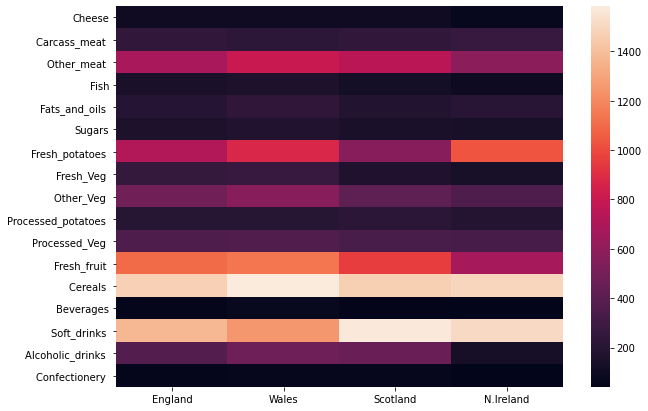

In [165]:
plt.figure(figsize=(10, 7))
sns.heatmap(df)

**TASK: Run the imports necessary to build an autoencoder. Our goal will be to reduce the dimensions from 17 --> 2 and see if any countries stand out as very different.**

In [166]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import SGD

In [167]:
scaler = MinMaxScaler()

**TASK: Create an encoder. In the solutions we built one that went 17 --> 8 --> 4 --> 2**

In [168]:
encoder = Sequential()
encoder.add(Dense(8, 'relu'))
encoder.add(Dense(4, 'relu'))
encoder.add(Dense(2, 'relu'))

In [169]:
encoder.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

**TASK: Create a decoder. In the solutions we built one that went 2-->4-->8-->17**

In [170]:
decoder = Sequential()
decoder.add(Dense(4, 'relu'))
decoder.add(Dense(8, 'relu'))
decoder.add(Dense(17, 'relu'))

**TASK: Combine the encoder and decoder to be an autoencoder and compile the model.**

In [171]:
auto_encoder = Sequential([encoder, decoder])

In [172]:
auto_encoder.compile(loss='binary_crossentropy', optimizer=SGD(lr=1.5),metrics=['accuracy'])

**TASK: Create a MinMaxScaler to scale the data. Make sure to transpose the data, since we really have 17 feature columns and only 4 rows (one per country).**

In [173]:
sclaer = MinMaxScaler()

In [174]:
scaled_data = scaler.fit_transform(df.transpose())

In [175]:
scaled_data

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [176]:
# NOTE the shape should be 17 columns by 4 rows.

**TASK: Fit the autoencoder to the scaled data for 15 epochs.**

In [177]:
auto_encoder.fit(scaled_data, scaled_data, epochs=15, batch_size=1)

Epoch 1/15
4/4 [==============================] - 0s 2ms/step - loss: 7.0772 - accuracy: 0.2500
Epoch 2/15
4/4 [==============================] - 0s 2ms/step - loss: 7.7572 - accuracy: 0.2500
Epoch 3/15
4/4 [==============================] - 0s 2ms/step - loss: 7.7572 - accuracy: 0.2500
Epoch 4/15
4/4 [==============================] - 0s 2ms/step - loss: 7.7572 - accuracy: 0.2500
Epoch 5/15
4/4 [==============================] - 0s 2ms/step - loss: 7.7572 - accuracy: 0.2500
Epoch 6/15
4/4 [==============================] - 0s 1ms/step - loss: 7.7572 - accuracy: 0.2500
Epoch 7/15
4/4 [==============================] - 0s 2ms/step - loss: 7.7572 - accuracy: 0.2500
Epoch 8/15
4/4 [==============================] - 0s 1ms/step - loss: 7.7572 - accuracy: 0.2500
Epoch 9/15
4/4 [==============================] - 0s 2ms/step - loss: 7.7572 - accuracy: 0.2500
Epoch 10/15
4/4 [==============================] - 0s 2ms/step - loss: 7.7572 - accuracy: 0.2500
Epoch 11/15
4/4 [======================

**TASK: Run the scaled data through only the encoder and predict the reduced dimensionalty output. Note: You will most likely get different results than us due to random initialiations.**

In [178]:
encoded_data = encoder.predict(scaled_data)

In [179]:
encoded_data = pd.DataFrame(encoded_data)
encoded_data

,0,1
0,0.0,800.964905
1,0.0,980.976440
2,0.0,644.579468
3,0.0,246.785614


**TASK: Join the encoded 2 dimensional data with the original countries index. Triple check the index order to make sure its joined correctly. There are many ways to do this with pandas.**

In [180]:
# pd.concat()
indexes = pd.Series(df.transpose().index)
indexes
concat_data = pd.concat([indexes, encoded_data], axis=1)

In [181]:
concat_data.columns = ['index', 'C1', 'C2']

In [182]:
concat_data

,index,C1,C2
0,England,0.0,800.964905
1,Wales,0.0,980.976440
2,Scotland,0.0,644.579468
3,N.Ireland,0.0,246.785614


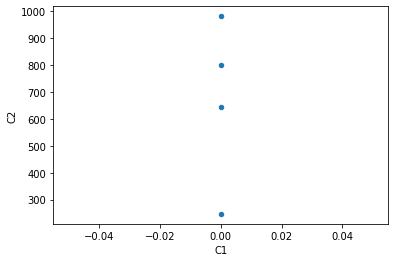

In [183]:
# concat_data.plot(x='C1', y='C2', kind='scatter')
concat_data.set_index('index').plot.scatter(x='C1', y='C2')

**TASK: Now plot out these results in a scatterplot, labeled by their respective country. You should see N. Ireland further away from the other points (but not necessarily to the left or the right, could be centered further away from the others).**

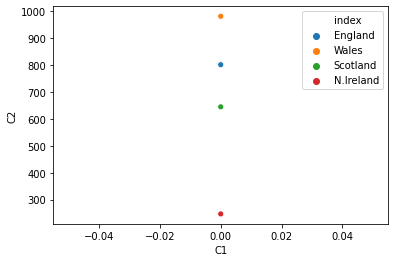

In [184]:
sns.scatterplot(x='C1', y='C2', data=concat_data, hue='index')

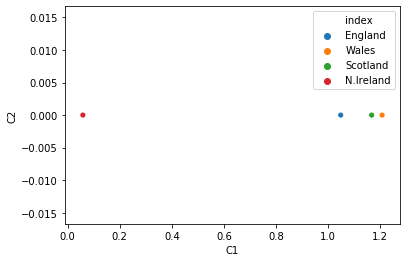

 Once we go back and look at the data in the table, this makes sense: the Northern Irish eat way more grams of fresh potatoes and way fewer of fresh fruits, cheese, fish and alcoholic drinks. It's a good sign that structure we've visualized reflects a big fact of real-world geography: Northern Ireland is the only of the four countries not on the island of Great Britain. (If you're confused about the differences among England, the UK and Great Britain, see: this [video](https://www.youtube.com/watch?v=rNu8XDBSn10).)